# House Price Prediction Using Neural Networks
---

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<Axes: xlabel='price', ylabel='Count'>

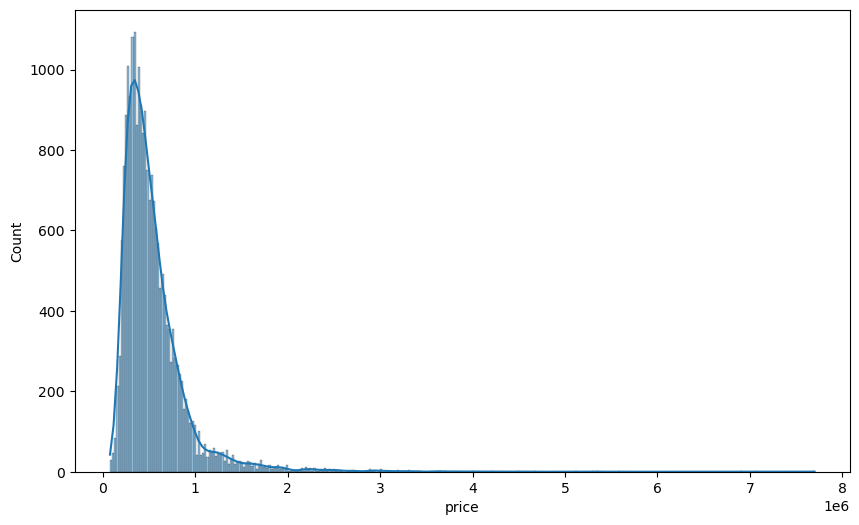

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(x='price',data=df,kde=True)

<Axes: xlabel='bedrooms', ylabel='count'>

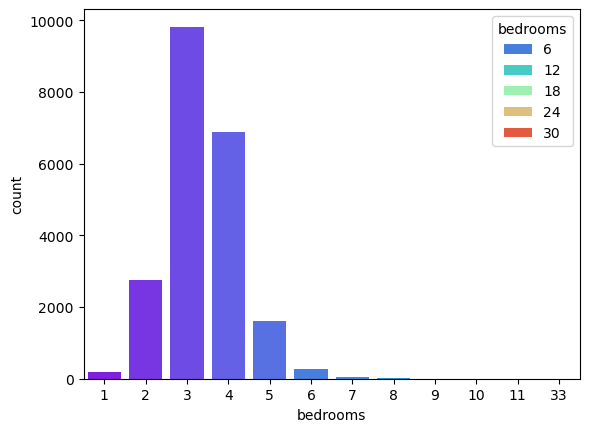

In [35]:
sns.countplot(x='bedrooms',data=df,hue='bedrooms',palette='rainbow')

In [49]:
df.drop('date',axis=1).corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [43]:
df.drop('date',axis=1).corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

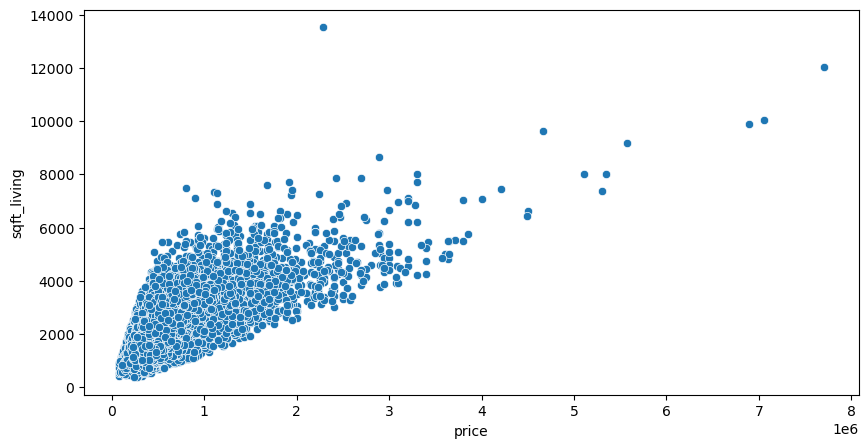

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

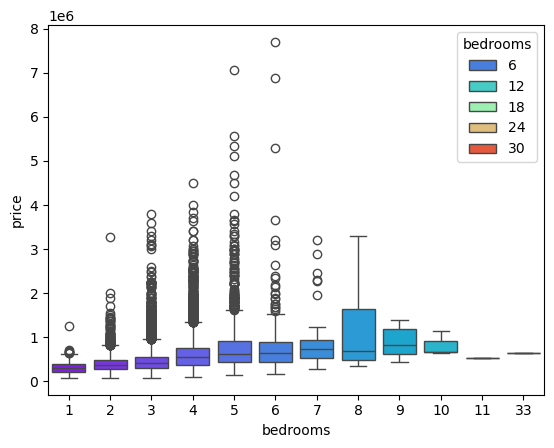

In [59]:
sns.boxplot(x='bedrooms',y='price',data=df,hue='bedrooms',palette='rainbow')

There are variations in the price between 3 and 5 bedrooms

<Axes: xlabel='price', ylabel='long'>

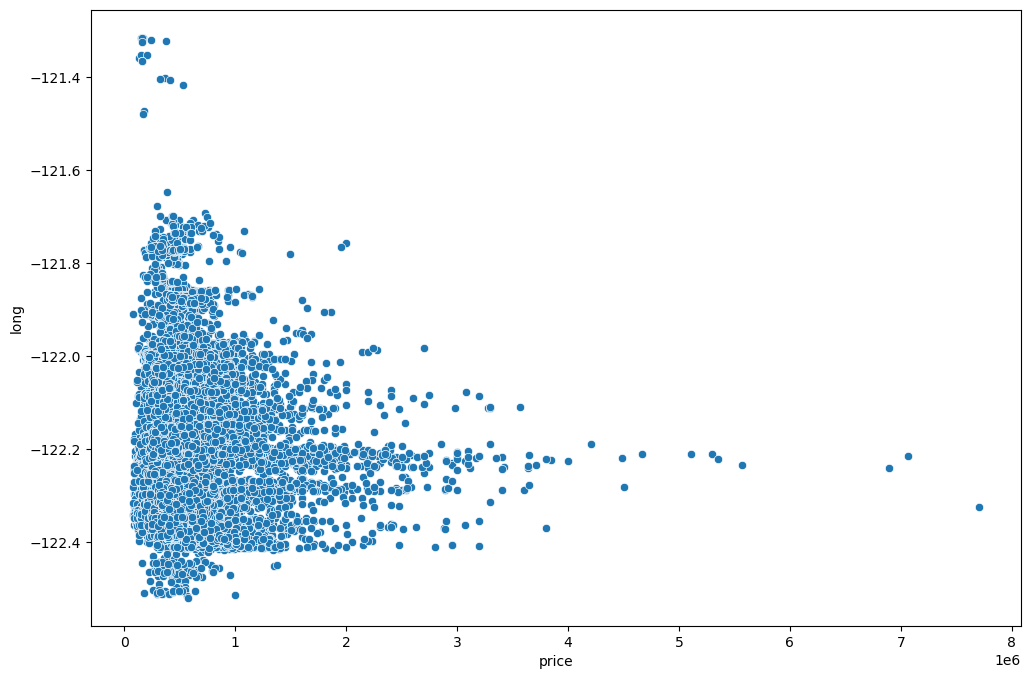

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

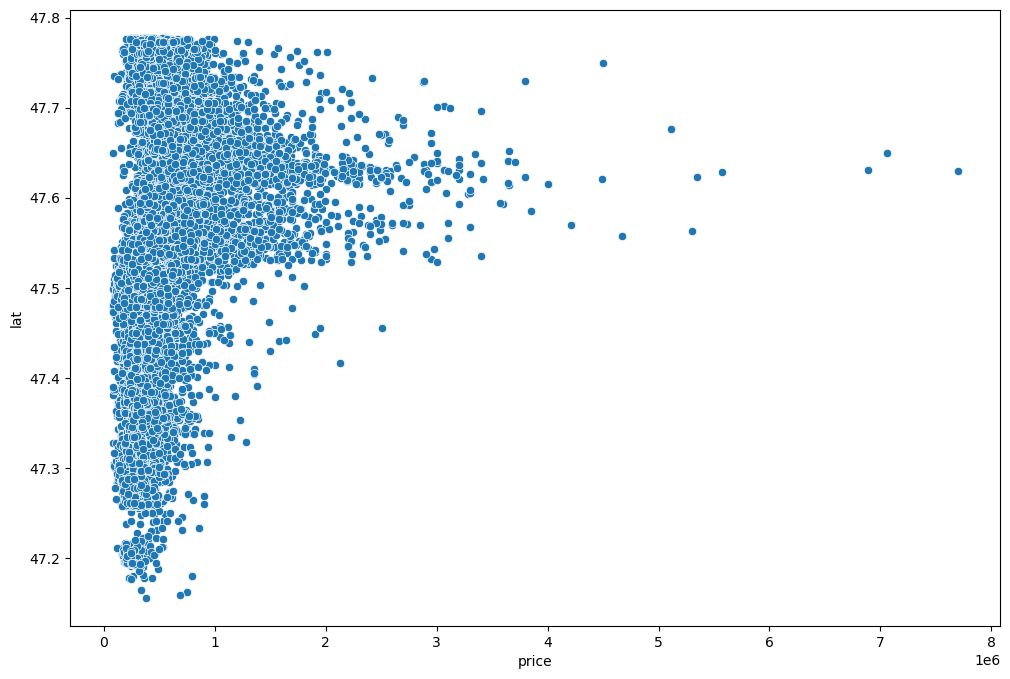

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='long', ylabel='lat'>

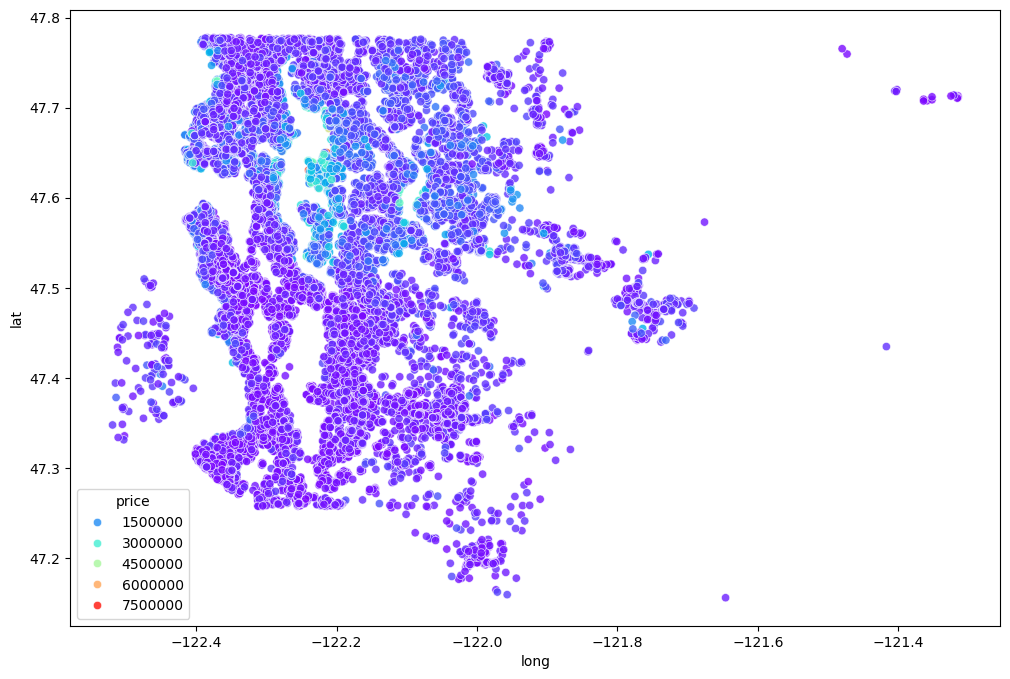

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',alpha=0.8,palette='rainbow')

Gives the shape of king county's map. Also we get to the see the hotspots where the prices are high.

In [77]:
len(df)*(0.01)

215.97

In [79]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

Removing top extreme values

<Axes: xlabel='long', ylabel='lat'>

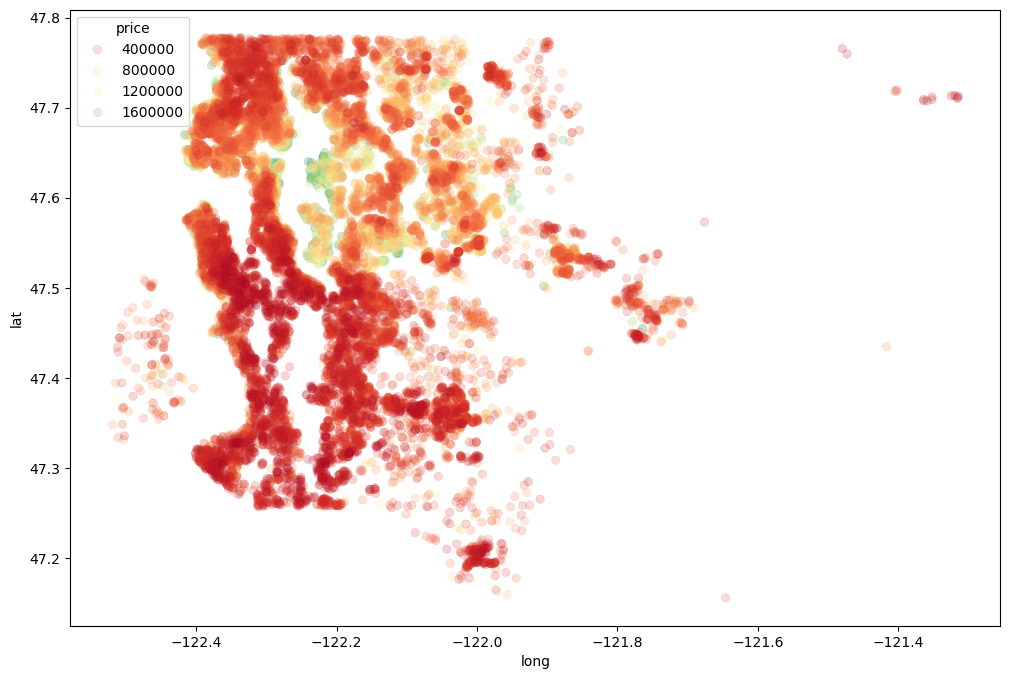

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',alpha=0.2,palette='RdYlGn',edgecolor=None)

<Axes: xlabel='waterfront', ylabel='price'>

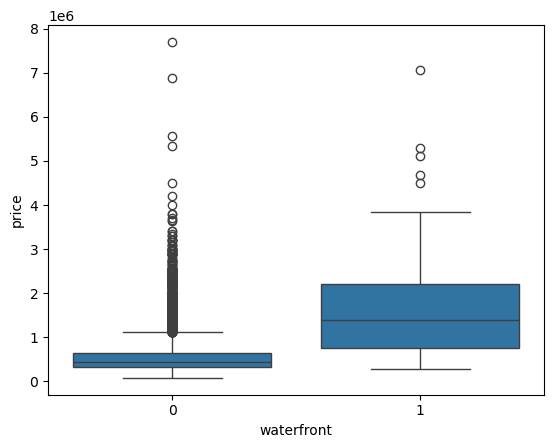

In [100]:
sns.boxplot(x='waterfront',y='price',data=df)

In [102]:
df=df.drop('id',axis=1)

In [106]:
df['date']=pd.to_datetime(df['date'])

In [108]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

Removed id and changed date to proper format

In [115]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)

In [117]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


<Axes: xlabel='month', ylabel='price'>

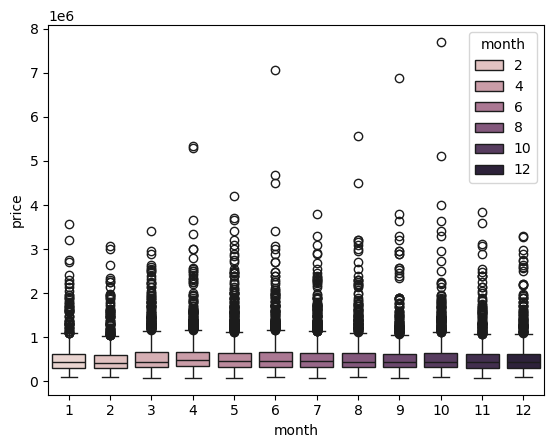

In [123]:
sns.boxplot(x='month',y='price',data=df,hue='month')

<Axes: xlabel='month'>

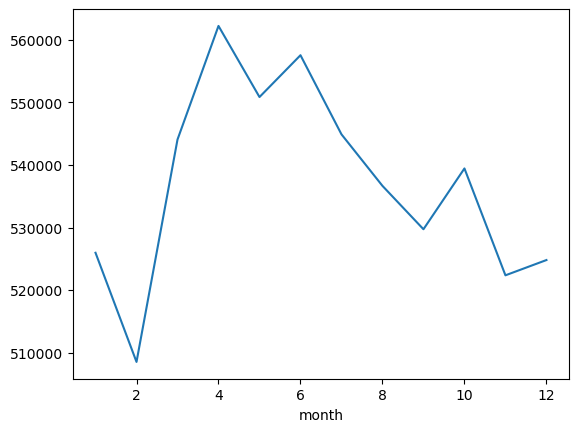

In [139]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

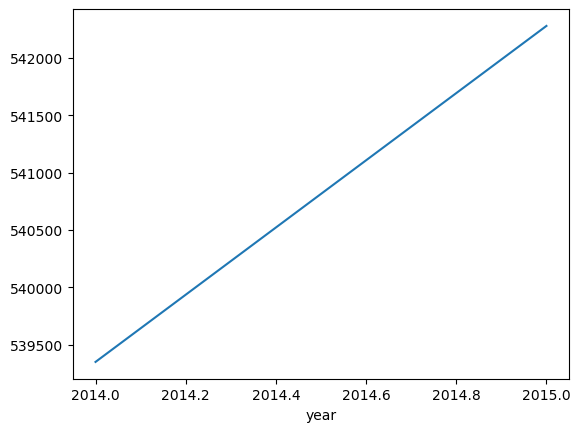

In [141]:
df.groupby('year').mean()['price'].plot()

In [143]:
df.drop('date',axis=1,inplace=True)

In [145]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


Zipcode is not a feature and is best to remove it.

In [148]:
df.drop('zipcode',axis=1,inplace=True)

In [154]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Since recent rennovation increases the price of the house, it is better to leave it, as it is.

In [158]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [160]:
X = df.drop('price',axis=1)
y = df['price']

In [162]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
scaler=MinMaxScaler()

In [170]:
X_train=scaler.fit_transform(X_train)

In [172]:
X_test=scaler.fit_transform(X_test)

In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [188]:
X_train.shape

(15117, 19)

Since there are 19 features, it's better to choose 19 neurons.

In [193]:
model=Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [195]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 431289729024.0000 - val_loss: 418920529920.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 425539731456.0000 - val_loss: 415415009280.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 409554944000.0000 - val_loss: 382447091712.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 369620058112.0000 - val_loss: 265039347712.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 231083671552.0000 - val_loss: 125303054336.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117141454848.0000 - val_loss: 97562730496.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95580758016.0000 - val_loss: 95256084480.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96109617152.0000 - val_loss: 93610442752.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98698092544.0000 - val_loss: 92075950080.0000
Epoch 10/400
119/119 ━━━━━

In [207]:
losses=pd.DataFrame(model.history.history)

<Axes: >

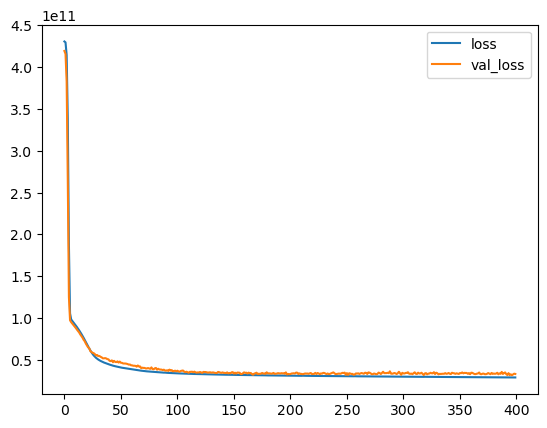

In [209]:
losses.plot()

It seems like the data doesn't overfit.

## Evaluation

In [217]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [219]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step


In [221]:
mean_absolute_error(y_test,predictions)

109663.41251687886

In [223]:
np.sqrt(mean_squared_error(y_test,predictions))

183021.5017646988

In [225]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [227]:
explained_variance_score(y_test,predictions)

0.7817032330659849

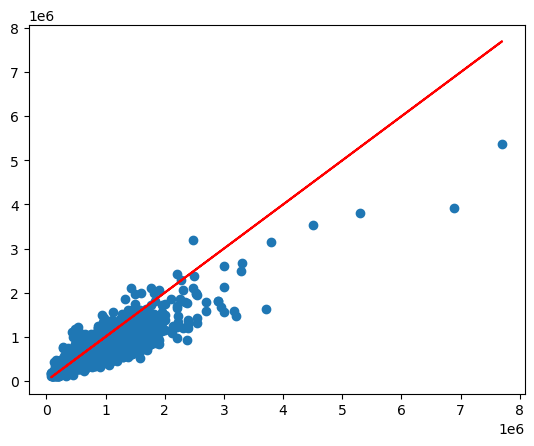

In [229]:
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## Predicting on a new house

In [233]:
single_house = df.drop('price',axis=1).iloc[0]

In [235]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

C:\Users\Phantom\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [237]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[245038.42]], dtype=float32)

In [243]:
df.iloc[0]['price']

221900.0

The price is close!!

## Training without the top outliers

In [249]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [272]:
df['price'].sort_values(ascending=False).head(15)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
Name: price, dtype: float64

In [280]:
ndf=df.sort_values('price',ascending=False).iloc[15:]

In [282]:
ndf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
16288,3710000.0,4,3.50,5550,28078,2.0,0,2,4,12,3350,2200,2000,0,47.6395,-122.234,2980,19602,2014,5
18467,3650000.0,5,3.75,5020,8694,2.0,0,1,3,12,3970,1050,2007,0,47.6146,-122.213,4190,11275,2015,5
6502,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,47.6515,-122.277,3510,15810,2015,4
15241,3640000.0,4,3.25,4830,22257,2.0,1,4,4,11,4830,0,1990,0,47.6409,-122.241,3820,25582,2014,9
19133,3640000.0,5,6.00,5490,19897,2.0,0,0,3,12,5490,0,2005,0,47.6165,-122.236,2910,17600,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,47.4799,-122.296,1572,10570,2014,5
8267,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,2014,11
16184,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5


In [316]:
X = ndf.drop('price',axis=1)
y = ndf['price']

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [348]:
scaler2=MinMaxScaler()

In [350]:
X_train=scaler2.fit_transform(X_train)

In [352]:
X_test=scaler2.fit_transform(X_test)

In [354]:
X_train.shape

(15107, 19)

In [356]:
model2=Sequential()

model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))

model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

In [358]:
model2.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=300)

Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 406918365184.0000 - val_loss: 415469666304.0000
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 416754302976.0000 - val_loss: 412345466880.0000
Epoch 3/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 399615721472.0000 - val_loss: 382436900864.0000
Epoch 4/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 344016715776.0000 - val_loss: 273182408704.0000
Epoch 5/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 219467923456.0000 - val_loss: 126879866880.0000
Epoch 6/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105383673856.0000 - val_loss: 89354518528.0000
Epoch 7/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85780013056.0000 - val_loss: 86473760768.0000
Epoch 8/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87904657408.0000 - val_loss: 85244370944.0000
Epoch 9/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79768133632.0000 - val_loss: 83472760832.0000
Epoch 10/300
119/119 ━━━━━

<Axes: >

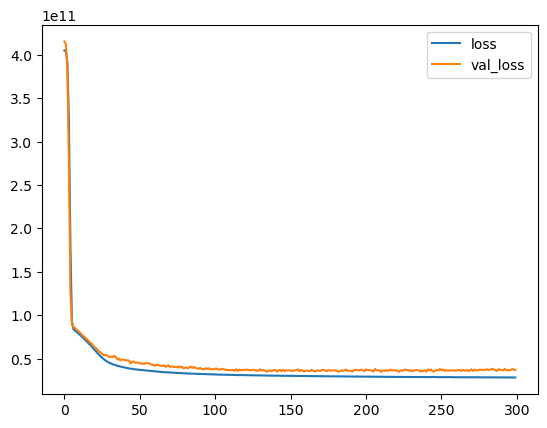

In [359]:
losses2 = pd.DataFrame(model2.history.history)
losses2.plot()

In [377]:
predictions2 = model2.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


In [379]:
model2.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[241059.95]], dtype=float32)

In [381]:
mean_absolute_error(y_test,predictions2)

120044.66777087355

In [383]:
explained_variance_score(y_test,predictions2)

0.747937212815721

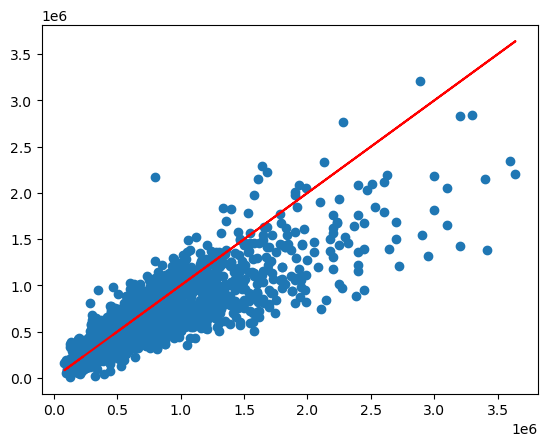

In [385]:
plt.scatter(y_test,predictions2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

There was no improvement in the model

# END